
**DOMAIN KNOWLEDGE OF KNOWLEDGE**

Nowadays, travelers most significantly use internet to book hotel and make an reservation [1](https://doi.org/10.1177/1938965511418779). Hotel bookings represent a contract between customer and the hotel. The demand of hotel bookings can influence hotel's revenue, allocation, and budgets. Hence, search for factor of bookings cancellation can prevent revenue loss and get better marketing strategy [2](http://dx.doi.org/10.18089/tms.2017.13203).

***

**BUSINESS UNDERSTANDING**

**Problem Statement**

1. When is the most bookings cancellation date?
2. What is the major factor influence bookings cancellation?
3. How accurate is machine learning model can predict bookings cancellation? What is the best model?

**Goals**
1. Identify most bookings cancellation date.
2. Analysis of bookings cancellation's influence factor.
3. Investigate accuration of machine learning models prediction of booking cancellation and choose the best model.

**Solution statement**

1. Use correlation of arrival date and book cancellation data.
2. Explore features based on EDA, mutual information, and Pearson correlation?
3. Use 5 difference classification machine learning algorithm (Logistic Regresion, KNN, Random Forest, Gradient Boosting and XGBoost) with accuracy >95%. Algorithm selection is based on higher on accuracy and recall score.

***


# **DATA UNDERSTANDING**
Dataset from [Hotel Booking Demand](https://www.sciencedirect.com/science/article/pii/S2352340918315191#s0005) by Nuno Antonio, Ana de Almeida, and Luis Nunesthat collected from comprehend booking from July 1, 2015 until August 31, 2017. This dataset contains two hotel H1 and H2. H1 is an resort hotel and the other one (H2) is an city hotel.

**Variables**

- **IsCanceled**: Value indicating if the booking was
canceled (1) or not (0).
- **LeadTime**: Number of days that elapsed between
the entering date of the booking into the
PMS (Property Management System) and the arrival date
- **ArrivalDateYear**: Year of arrival date.
- **ArrivalDateMonth**: Month of arrival date with 12 categories:
“January” to “December”.
- **ArrivalDateWeekNumber**: Week number of the arrival date.
- **ArivalDateDayOfMonth**: Day of the month of the arrival date.
- **StaysInWeekendNights**: Number of weekend nights (Saturday or
Sunday) the guest stayed or booked to
stay at the hotel.
- **StaysInWeekNights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay
at the hotel.
- **Adults**: Number of adults
- **Children**: Number of children.
- **Babies**: Number of babies.
- **Meal**: Type of meal booked. Categories are
presented in standard hospitality meal
packages:  Market segment designation. In
categories, the term “TA” means “Travel
Agents” and “TO” means “Tour
Operators”.
Undefined/SC – no meal package;
BB – Bed & Breakfast;
HB – Half board (breakfast and one
other meal – usually dinner);
FB – Full board (breakfast, lunch and
dinner)
- **Country**: Country of origin. Categories are represented in the ISO 3155–3:2013 forma.
- **MarketSegment**: Market segment designation. In
categories, the term “TA” means “Travel
Agents” and “TO” means “Tour
Operators”.
- **DistributionChannel**: Booking distribution channel. The term
“TA” means “Travel Agents” and “TO”
means “Tour Operators”.
- **IsRepeatedGuest**: Value indicating if the booking name
was from a repeated guest (1) or not (0).
- **PreviousCancellations**: Number of previous bookings that were
cancelled by the customer prior to the
current booking.
- **PreviousBookingsNotCanceled**:  Number of previous bookings not
cancelled by the customer prior to the
current booking.
- **ReservedRoomType**: Code of room type reserved. Code is
presented instead of designation for
anonymity reasons.
- **AssignedRoomType**: Code for the type of room assigned to the
booking. Sometimes the assigned room
type differs from the reserved room type
due to hotel operation reasons (e.g.
overbooking) or by customer request.
Code is presented instead of designation
for anonymity reasons.
- **BookingChanges**: Number of changes/amendments made
to the booking from the moment the
booking was entered on the PMS until
the moment of check-in or cancellation.
- **DepositType**: Indication on if the customer made a
deposit to guarantee the booking. This
variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in
the value of the total stay cost; Refundable – a deposit was made with
a value under the total cost of stay.
- **Agent**:  ID of the travel agency that made the
booking.
- **Company**: ID of the company/entity that made the
booking or responsible for paying the
booking. ID is presented instead of designation for anonymity reasons.
- **DaysInWaitingList**:  Number of days the booking was in the
waiting list before it was confirmed to
the customer.
- **CustomerType**: Type of booking, assuming one of four
categories:
BO and BL
Contract - when the booking has an
allotment or other type of contract
associated to it;
Group – when the booking is associated to a group;
Transient – when the booking is not
part of a group or contract, and is not
associated to other transient booking;
Transient-party – when the booking is
transient, but is associated to at least
other transient booking.
- **ADR**: Average Daily Rate as defined by American Hotel and Lodging Association.
- **RequiredCarParkingSpaces**: Number of car parking spaces required
by the customer.
- **TotalOfSpecialRequests**:  Number of special requests made by the
customer (e.g. twin bed or high floor).
- **ReservationStatus**: l Reservation last status, assuming one of
three categories:
BO
Canceled – booking was canceled by
the customer;
Check-Out – customer has checked in
but already departed;
No-Show – customer did not check-in
and did inform the hotel of the reason
why.
- **ReservationStatusDate**: Date at which the last status was set.
This variable can be used in conjunction
with the ReservationStatus to understand
when was the booking canceled or when
did the customer checked-out of the
hotel.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/BOOTCAMP/advanced machine learning dicoding/H1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/BOOTCAMP/advanced machine learning dicoding/H2.csv')

Add column **IsResort** in both dataset. For dataset 1, the value is 1 and the other is 0. Then we combine those dataset.

In [ ]:
#add IsResort Hotel column
df1['IsResort'] = 1
df2['IsResort'] = 0
#combine df1 drom hotel 1 and df2 from hotel 2
df = pd.concat([df1, df2])

In [ ]:
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,IsResort
0,0,342,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,1
1,0,737,2015,July,27,1,0,0,2,0.0,...,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01,1
2,0,7,2015,July,27,1,0,1,1,0.0,...,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,0,13,2015,July,27,1,0,1,1,0.0,...,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,0,14,2015,July,27,1,0,2,2,0.0,...,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06,0
79326,0,102,2017,August,35,31,2,5,3,0.0,...,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07,0
79327,0,34,2017,August,35,31,2,5,2,0.0,...,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07,0
79328,0,109,2017,August,35,31,2,5,2,0.0,...,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13  Marke

## **Check Missing Values**

In [ ]:
df.isnull().sum()

,0
IsCanceled,0
LeadTime,0
ArrivalDateYear,0
ArrivalDateMonth,0
ArrivalDateWeekNumber,0
ArrivalDateDayOfMonth,0
StaysInWeekendNights,0
StaysInWeekNights,0
Adults,0
Children,4


Drop some missing values in **Country** and **Children** features.

In [ ]:
df.dropna(inplace=True)

## **Check Duplicated Data**

In [ ]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,IsResort
4,0,14,2015,July,27,1,0,2,2,0.0,...,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,1
5,0,14,2015,July,27,1,0,2,2,0.0,...,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03,1
21,0,72,2015,July,27,1,2,4,2,0.0,...,250,NULL,0,Transient,84.67,0,1,Check-Out,2015-07-07,1
22,0,72,2015,July,27,1,2,4,2,0.0,...,250,NULL,0,Transient,84.67,0,1,Check-Out,2015-07-07,1
39,0,70,2015,July,27,2,2,3,2,0.0,...,250,NULL,0,Transient,137.00,0,1,Check-Out,2015-07-07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79292,0,63,2017,August,35,31,0,3,3,0.0,...,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,0
79293,0,63,2017,August,35,31,0,3,3,0.0,...,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,0
79294,0,63,2017,August,35,31,0,3,3,0.0,...,9,NULL,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,0
79312,0,175,2017,August,35,31,1,3,1,0.0,...,42,NULL,0,Transient,82.35,0,1,Check-Out,2017-09-04,0


There are 40119 rows of duplicated data. The duplicated data is represent real-world entities of hotel transaction, so drop its duplicated data might cause missing information.

## **Check Outlier**

Column that might have outlier is **ADR**, that is average daily rates of hotel's rooms.

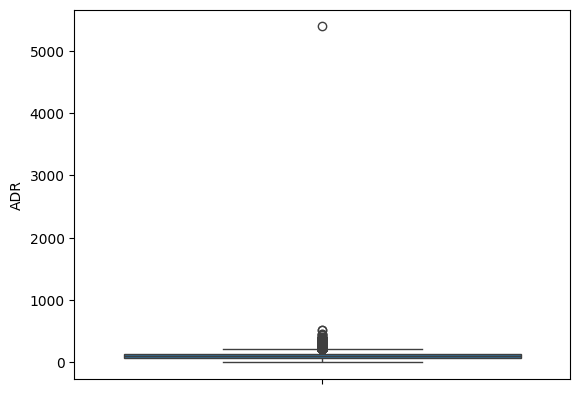

In [ ]:
sns.boxplot(df['ADR'])
plt.show()

In [ ]:
df[df['ADR'] == 5400.0]['ReservationStatus']

,ReservationStatus
8455,Canceled


There is extreme outlier value of **ADR**. Keep it because it might contains luxury bookings information.

## **Exploratory Data Analysis**

### **Univariate Analysis**

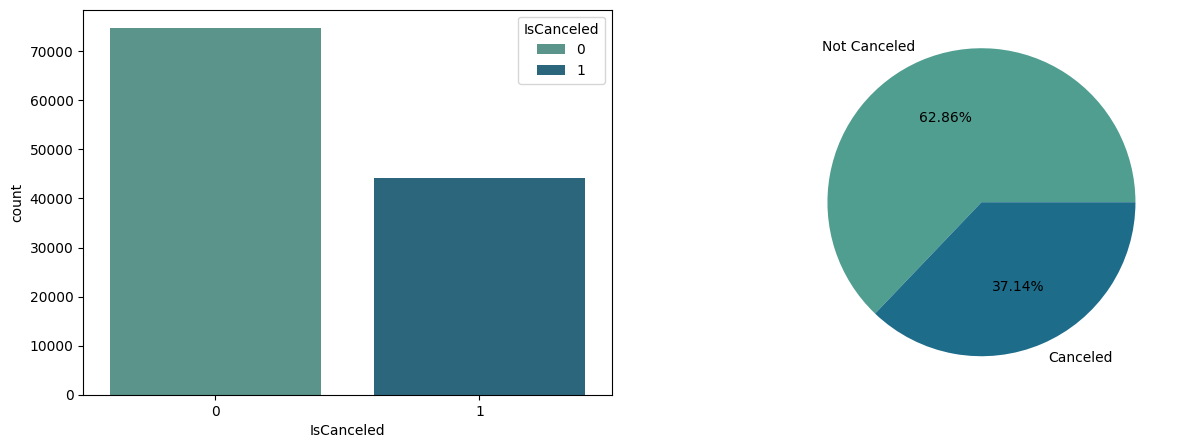

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
palette = sns.color_palette("crest", n_colors=2)
sns.countplot(ax=ax[0], data=df, x="IsCanceled", hue="IsCanceled", palette=palette)
ax[1].pie(df["IsCanceled"].value_counts(), labels=["Not Canceled", "Canceled"], autopct="%.02f%%", colors=palette)
plt.show()

From pie chart above, the majority of dataset is not canceled by customer.

<ipython-input-14-2a837ce1fc67>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(labels=df["CustomerType"].unique(), rotation=45)
<ipython-input-14-2a837ce1fc67>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][1].set_xticklabels(labels=df["MarketSegment"].unique(), rotation=45)
<ipython-input-14-2a837ce1fc67>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][2].set_xticklabels(labels=df["DistributionChannel"].unique(), rotation=45)


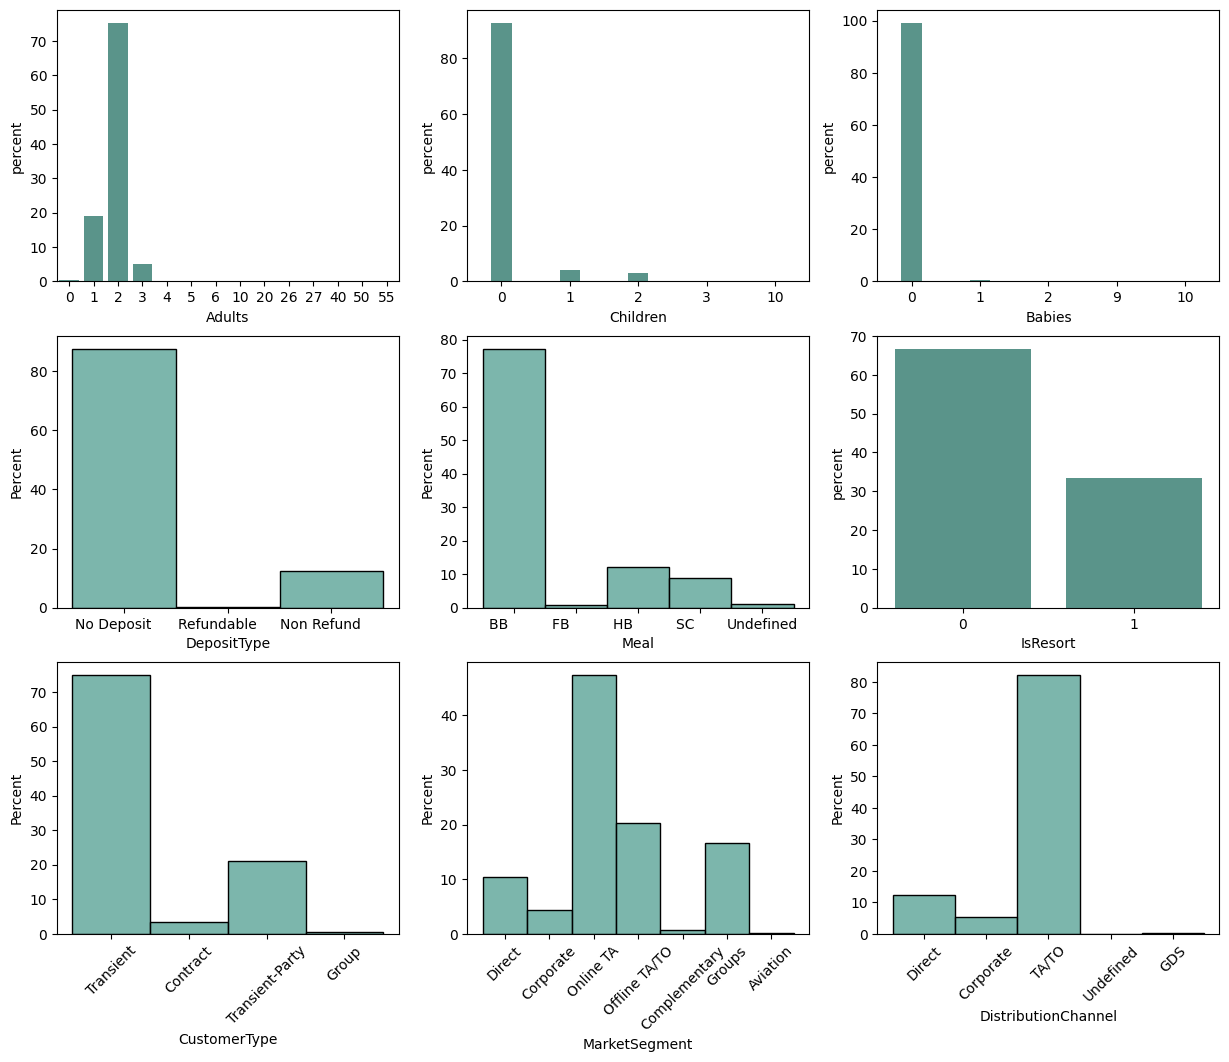

In [ ]:
fig, ax = plt.subplots(3,3,figsize=(15,12))
sns.countplot(ax=ax[0][0], data=df, x="Adults", color=palette[0], stat="percent")
sns.countplot(ax=ax[0][1], data=df, x="Children", color=palette[0], stat="percent", width=.3)
sns.countplot(ax=ax[0][2], data=df, x="Babies", color=palette[0], stat="percent", width=.3)

sns.histplot(ax=ax[2][0], data=df, x="CustomerType", color=palette[0], stat="percent")
ax[2][0].set_xticklabels(labels=df["CustomerType"].unique(), rotation=45)
sns.histplot(ax=ax[2][1], data=df, x="MarketSegment", color=palette[0], stat="percent")
ax[2][1].set_xticklabels(labels=df["MarketSegment"].unique(), rotation=45)
sns.histplot(ax=ax[2][2], data=df, x="DistributionChannel", color=palette[0], stat="percent")
ax[2][2].set_xticklabels(labels=df["DistributionChannel"].unique(), rotation=45)

sns.histplot(ax=ax[1][0], data=df, x="DepositType", color=palette[0], stat="percent")
sns.histplot(ax=ax[1][1], data=df, x="Meal", color=palette[0], stat="percent")
sns.countplot(ax=ax[1][2], data=df, x="IsResort", color=palette[0], stat="percent")
plt.show()

Observations:
- The majority of customers is two adult and percentage of underage person is minimum, with more than 75% is transient customer (not a part of group, contract or other transient party).
- More than 80% Customer's deposit type is no deposit.
- More than 60% of dataset is an customer of city hotel.
- The majority of booking distribution is delivered by travel agent/tour operators and market segmentation is also delivered by online travel agent.

### **Multivariate Analysis**

<ipython-input-15-fbb87d600ce8>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][0].set_xticklabels(labels=df["DistributionChannel"].unique(), rotation=45)
<ipython-input-15-fbb87d600ce8>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][1].set_xticklabels(labels=df["MarketSegment"].unique(), rotation=45)


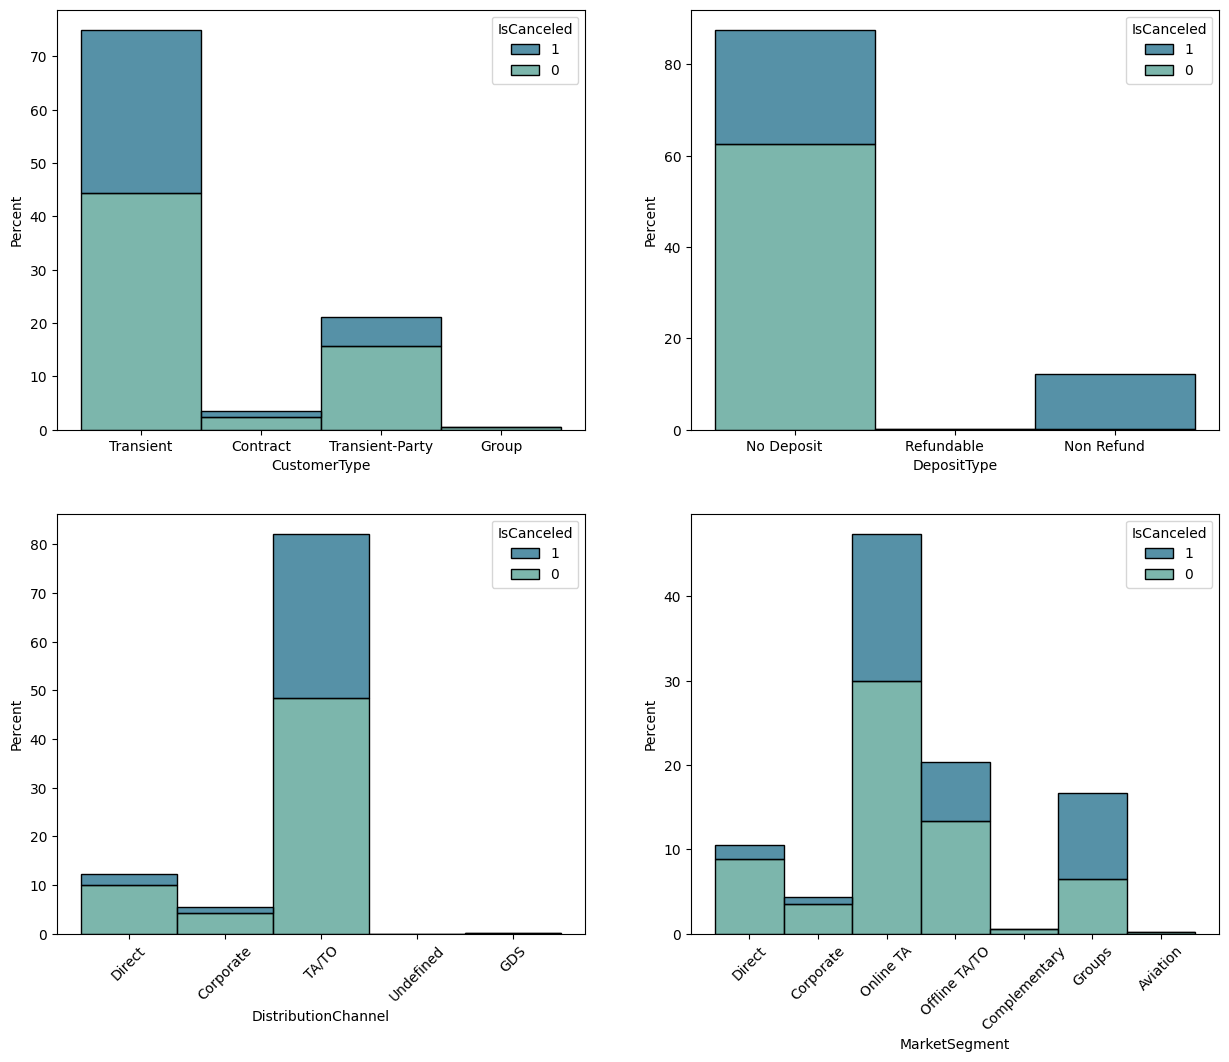

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
palette = sns.color_palette("crest", n_colors=2)
sns.histplot(ax=ax[0][0], data=df, x="CustomerType", palette={0:palette[0], 1:palette[1]},
             stat="percent", hue='IsCanceled', hue_order=[1,0], multiple="stack")
ax[1][0].set_xticklabels(labels=df["DistributionChannel"].unique(), rotation=45)
sns.histplot(ax=ax[0][1], data=df, x="DepositType", palette={0:palette[0], 1:palette[1]},
             stat="percent", hue='IsCanceled', hue_order=[1,0], multiple="stack")

sns.histplot(ax=ax[1][0], data=df, x="DistributionChannel", palette={0:palette[0], 1:palette[1]},
             stat="percent", hue='IsCanceled', hue_order=[1,0], multiple="stack")
sns.histplot(ax=ax[1][1], data=df, x="MarketSegment", palette={0:palette[0], 1:palette[1]},
             stat="percent", hue='IsCanceled', hue_order=[1,0], multiple="stack")
ax[1][1].set_xticklabels(labels=df["MarketSegment"].unique(), rotation=45)

plt.show()

Observations:
- The most canceled booking is by transient customer which is has the most number of booked.
- The most booking channel and market segment of customer is travel agent with the most canceled booking.
- Groups market segment has most canceled booking based on proportion.
- All of Non-refund deposit type is canceled booking.


In [ ]:
#create dataframe of canceled booking
book_canceled = df[df['IsCanceled']==1][['Arrival']]
book_canceled['Number'] = 1
book_canceled = book_canceled.set_index('Arrival').resample('M').sum()
#create dataframe of not canceled booking
book_not_canceled = df[df['IsCanceled']==0][['Arrival']]
book_not_canceled['Number'] = 1
book_not_canceled = book_not_canceled.set_index('Arrival').resample('M').sum()

<ipython-input-16-cc6a6c0c064f>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  book_canceled = book_canceled.set_index('Arrival').resample('M').sum()
<ipython-input-16-cc6a6c0c064f>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  book_not_canceled = book_not_canceled.set_index('Arrival').resample('M').sum()


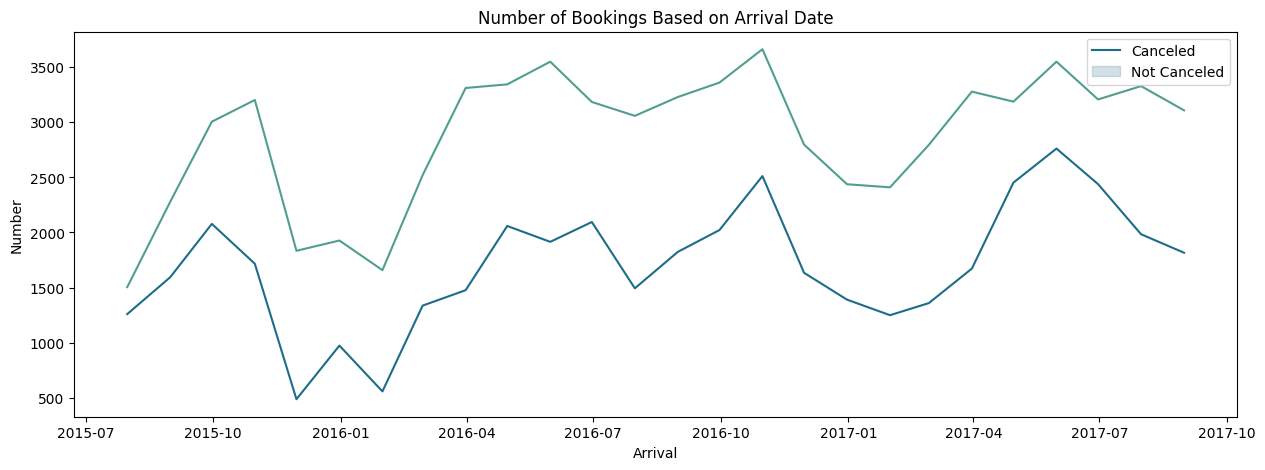

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=book_canceled,x="Arrival",  y="Number", color=palette[1])
sns.lineplot(data=book_not_canceled, x="Arrival", y="Number", color=palette[0])
plt.legend(["Canceled", "Not Canceled"])
plt.title("Number of Bookings Based on Arrival Date")
plt.show()

Observations:
- Both canceled and non-canceled bookings increase during certain periods (e.g., mid-2016, late 2016, and mid-2017).These peaks likely correspond to high-travel seasons (e.g., holidays or vacation periods).
- The number of cancellations generally follows the pattern of total bookings.
Higher booking periods also have higher cancellations, which suggests that during peak seasons, people make more reservations but also cancel more frequently.
- Some months show spikes in cancellations (e.g., early 2016, late 2016, and mid-2017), which may indicate factors such as policy changes, pricing adjustments, or market disruptions.

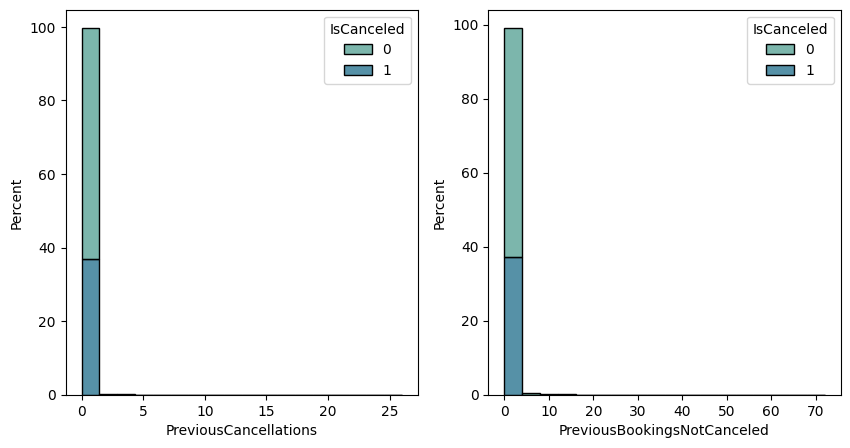

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(ax=ax[0],data=df, x="PreviousCancellations", hue="IsCanceled", palette=palette, stat="percent", multiple="stack")
sns.histplot(ax=ax[1],data=df, x="PreviousBookingsNotCanceled", hue="IsCanceled", palette=palette, stat="percent", multiple="stack")
plt.show()

Observation:
- The current status is not influenced by status of previous booking (canceled or not canceled)

<Axes: xlabel='ReservedRoomType', ylabel='count'>

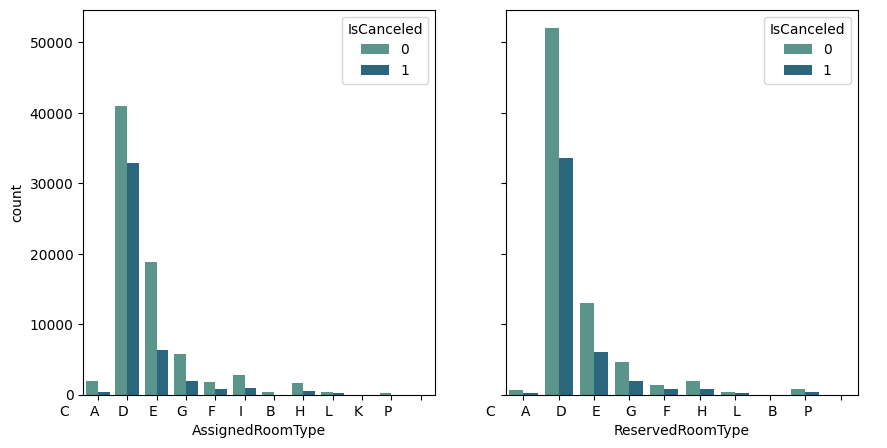

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True)
sns.countplot(ax=ax[0], data=df, x="AssignedRoomType", hue="IsCanceled", palette=palette)
sns.countplot(ax=ax[1], data=df, x="ReservedRoomType", hue="IsCanceled", palette=palette)

Observations:
- The majority of room type booked by customer is D. It also has a high number of cancellations, indicating that this room type might be more prone to cancellations.
- Some room types appear more in the assigned than the reserved category (e.g., 'E' and 'G'). A potential cause for cancellations could be room assignment mismatches—customers may cancel if they do not get the room they originally reserved.

<Axes: xlabel='TotalOfSpecialRequests', ylabel='count'>

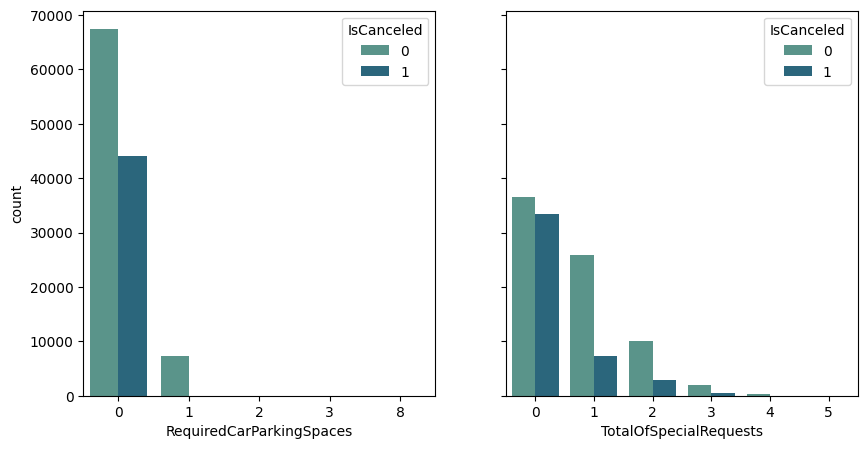

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True)
palette = sns.color_palette("crest", n_colors=2)
sns.countplot(ax=ax[0], data=df, x="RequiredCarParkingSpaces", hue="IsCanceled", palette=palette)
sns.countplot(ax=ax[1], data=df, x="TotalOfSpecialRequests", hue="IsCanceled", palette=palette)

Observations:
- Hotel with 0 car parking space most likely canceled by customers.
- Hotel with 0 special requests (e.g. twin bed or high floor) most likely canceled by customers.

# **DATA PREPARATION**

## Feature Engineering

Data type of **Children** should be int64 and data type of **ReservationStatusDate** should be datetime.

In [ ]:
df['Children'] = df['Children'].astype('int')
df['ReservationStatusDate'] = pd.to_datetime(df['ReservationStatusDate']).astype('datetime64[ns]')

Make another column:
- **Arrival**: datetime of customer's arrival (YYYY-MM-DD)

In [ ]:
df["Arrival"] = df["ArrivalDateYear"].astype(str) + "-" + df["ArrivalDateMonth"].astype(str) + "-" + df["ArrivalDateDayOfMonth"].astype(str)
df["Arrival"] = pd.to_datetime(df["Arrival"])

In [ ]:
df.drop(columns=["ArrivalDateYear", "ArrivalDateMonth", "ArrivalDateDayOfMonth"], inplace=True)

In [ ]:
df.to_csv('data_hotel.csv')

## **Feature Encoding**

In [ ]:
#encoding and one-hot encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 79329
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   IsCanceled                   118898 non-null  int64         
 1   LeadTime                     118898 non-null  int64         
 2   ArrivalDateWeekNumber        118898 non-null  int64         
 3   StaysInWeekendNights         118898 non-null  int64         
 4   StaysInWeekNights            118898 non-null  int64         
 5   Adults                       118898 non-null  int64         
 6   Children                     118898 non-null  int64         
 7   Babies                       118898 non-null  int64         
 8   Meal                         118898 non-null  object        
 9   Country                      118898 non-null  object        
 10  MarketSegment                118898 non-null  object        
 11  DistributionChannel          118

In [ ]:
df2 = df.copy()
# df2["Meal"] = LabelEncoder().fit_transform(df2["Meal"])
df2["Country"] = LabelEncoder().fit_transform(df2["Country"])
df2["MarketSegment"] = LabelEncoder().fit_transform(df2["MarketSegment"])
df2["DistributionChannel"] = LabelEncoder().fit_transform(df2["DistributionChannel"])
# df2["AssignedRoomType"] = LabelEncoder().fit_transform(df2["AssignedRoomType"])
df2["ReservedRoomType"] = LabelEncoder().fit_transform(df2["ReservedRoomType"])
df2["CustomerType"] = LabelEncoder().fit_transform(df2["CustomerType"])
df2["DepositType"] = LabelEncoder().fit_transform(df2["DepositType"])
df2["Agent"] = LabelEncoder().fit_transform(df2["Agent"])
df2["Company"] =LabelEncoder().fit_transform(df2["Company"])
df2["ReservationStatus"] = LabelEncoder().fit_transform(df2["ReservationStatus"])

Antonio et al. (2019) shows distribution of **Meal, AssignedRoomType**, and **Country** is different between canceled and not-canceled bookings. Make one-hot encoding based on **Meal** and **AssignedRoomType** categorical features because the large amount of variables of **Country**.

In [ ]:
df1 = df2.copy()  # Create a copy outside the loop

for col in ["Meal", "AssignedRoomType"]:
    one_hot_encoded = pd.get_dummies(df2[[col]], prefix=col, drop_first=False)

    # Convert boolean columns in one_hot_encoded to int64
    for column in one_hot_encoded.select_dtypes(include=['bool']).columns:
        one_hot_encoded[column] = one_hot_encoded[column].astype(np.int64)

    df1 = pd.merge(df1, one_hot_encoded, left_index=True, right_index=True, how='left')
    df1 = df1.drop(columns=[col])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356318 entries, 0 to 79329
Data columns (total 45 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   IsCanceled                         356318 non-null  int64         
 1   LeadTime                           356318 non-null  int64         
 2   ArrivalDateWeekNumber              356318 non-null  int64         
 3   StaysInWeekendNights               356318 non-null  int64         
 4   StaysInWeekNights                  356318 non-null  int64         
 5   Adults                             356318 non-null  int64         
 6   Children                           356318 non-null  int64         
 7   Babies                             356318 non-null  int64         
 8   Country                            356318 non-null  int64         
 9   MarketSegment                      356318 non-null  int64         
 10  DistributionChannel       

## **Feature Selection**

Use top 20 based on Pearson correlation.

In [ ]:
corr_matrix = df1.corr(numeric_only=True)
top_features = corr_matrix['IsCanceled'].abs().sort_values(ascending=False)[:20]
data_top = df1[top_features.index.to_list()]
corr_top_20 = corr_matrix.loc[top_features.index, top_features.index] #for heatmap display

In [ ]:
palette = sns.color_palette("crest", n_colors=5)

In [ ]:
top_features

,IsCanceled
IsCanceled,1.000000
ReservationStatus,0.904085
Duration,0.545761
DepositType,0.424236
IsResort,0.356841
LeadTime,0.300945
Agent,0.261522
RequiredCarParkingSpaces,0.256582
Country,0.235413
TotalOfSpecialRequests,0.214654


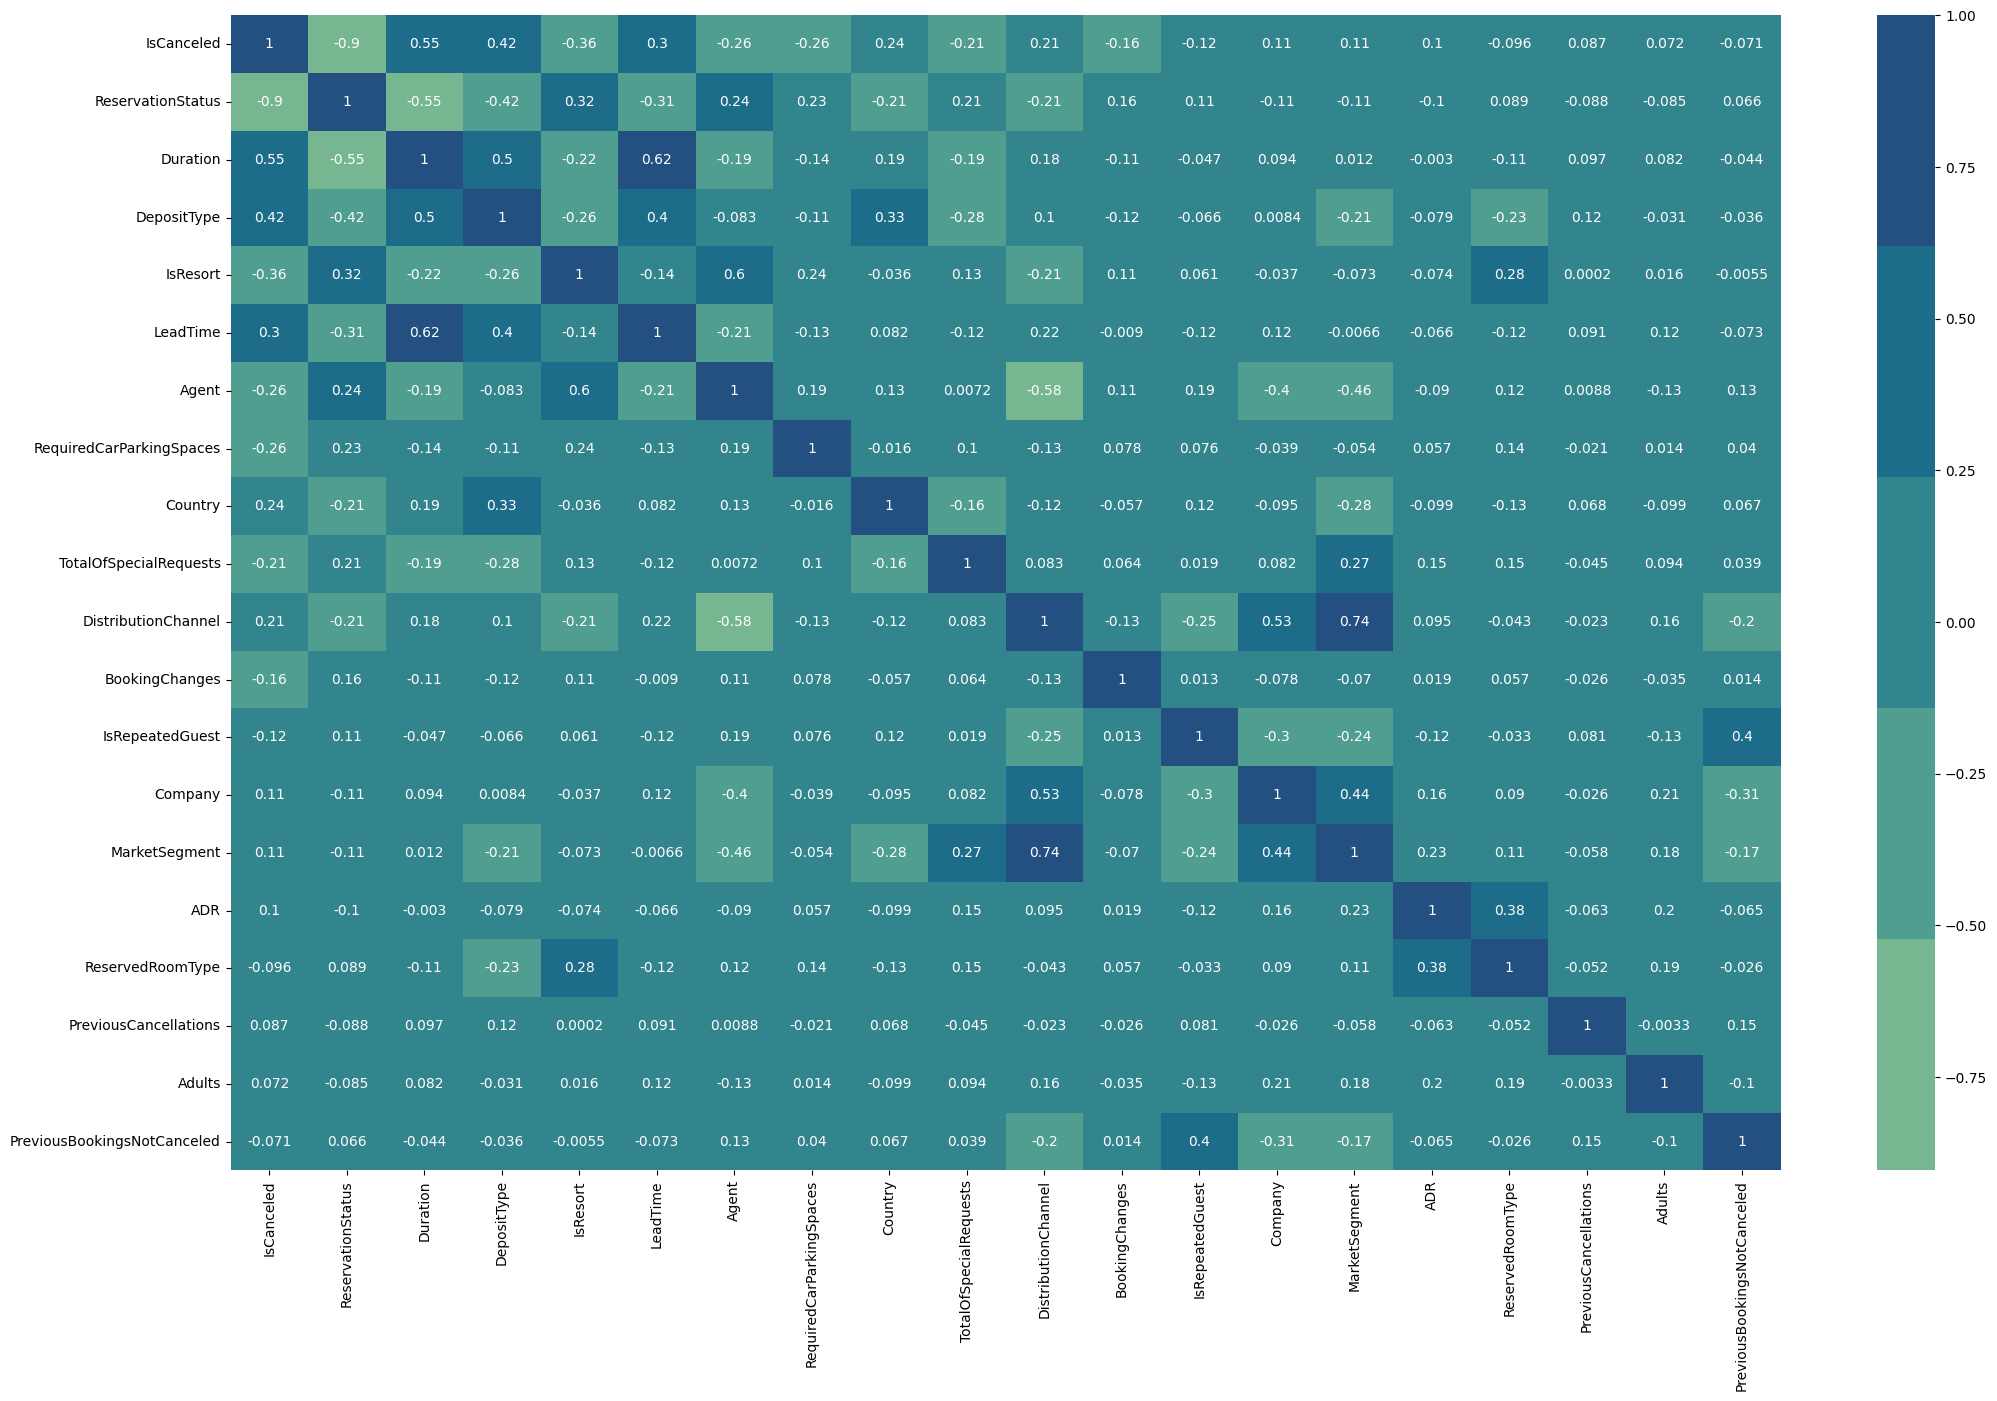

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(corr_top_20, cmap=palette, annot=True)
plt.show()

Drop features with correlation >0.7. We choose Distribution channel.

In [ ]:
final = data_top.drop(columns=["MarketSegment"])

In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356318 entries, 0 to 79329
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   356318 non-null  int64  
 1   ReservationStatus            356318 non-null  int64  
 2   Duration                     356318 non-null  int64  
 3   DepositType                  356318 non-null  int64  
 4   IsResort                     356318 non-null  int64  
 5   LeadTime                     356318 non-null  int64  
 6   Agent                        356318 non-null  int64  
 7   RequiredCarParkingSpaces     356318 non-null  int64  
 8   Country                      356318 non-null  int64  
 9   TotalOfSpecialRequests       356318 non-null  int64  
 10  DistributionChannel          356318 non-null  int64  
 11  BookingChanges               356318 non-null  int64  
 12  IsRepeatedGuest              356318 non-null  int64  
 13  Compa

## **Data Splitting**

We choose 70:30 for training and testing set.

In [ ]:
X = final.drop(columns=['IsCanceled'])
y = final['IsCanceled']

#split data 70:30
X_train, X_test, y_train, y_tst = train_test_split(X,y, test_size=0.3, random_state=42)


In [ ]:
len(X_test)

106896

## **Standarization**

In [ ]:
X_train.describe()

,ReservationStatus,Duration,DepositType,IsResort,LeadTime,Agent,RequiredCarParkingSpaces,Country,TotalOfSpecialRequests,DistributionChannel,BookingChanges,IsRepeatedGuest,Company,ADR,ReservedRoomType,PreviousCancellations,Adults,PreviousBookingsNotCanceled
count,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000,249422.000000
mean,0.547181,42.895093,0.156478,0.444436,110.647830,114.157344,0.069268,97.364543,0.506214,2.589551,0.209937,0.032379,336.571477,99.742261,1.044719,0.101234,1.862370,0.139915
std,0.522925,75.057899,0.368339,0.496904,110.783125,117.302910,0.257423,43.792100,0.764844,0.903287,0.638109,0.177005,55.752321,54.408251,1.752092,0.963268,0.590862,1.621371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,20.000000,8.000000,0.000000,56.000000,0.000000,3.000000,0.000000,0.000000,349.000000,65.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,7.000000,0.000000,0.000000,75.000000,72.000000,0.000000,135.000000,0.000000,3.000000,0.000000,0.000000,349.000000,90.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,49.000000,0.000000,1.000000,170.000000,174.000000,0.000000,135.000000,1.000000,3.000000,0.000000,0.000000,349.000000,124.000000,3.000000,0.000000,2.000000,0.000000
max,2.000000,526.000000,2.000000,1.000000,737.000000,332.000000,8.000000,176.000000,5.000000,4.000000,20.000000,1.000000,349.000000,5400.000000,9.000000,26.000000,55.000000,72.000000


In [ ]:
scaler = StandardScaler()
num_col = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.fit_transform(X_test[num_col])

# **DATA MODELING**

## **K-Nearest Neighbor**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_end_time = time.time()
knn_execution_time = knn_end_time - knn_start_time
print('Logistic regression has trained')
print(f"Execution time: {knn_execution_time} seconds")

Logistic regression has trained
Execution time: 0.04833245277404785 seconds


## **Logistic Regression**

In [ ]:
lr_start_time = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_end_time = time.time()
lr_execution_time = lr_end_time - lr_start_time
print('Logistic regression has trained')
print(f"Execution time: {lr_execution_time} seconds")

Logistic regression has trained
Execution time: 0.688485860824585 seconds


# **EVALUATION**

## **Train Set**

In [ ]:
#KNN
y_pred_knn_train = knn.predict(X_test)
acc_knn_train = round(accuracy_score(y_tst, y_pred_knn_train), 4)
pre_knn_train = round(precision_score(y_tst, y_pred_knn_train),4)
rec_knn_train = round(recall_score(y_tst, y_pred_knn_train),4)
f1_knn_train = round(f1_score(y_tst, y_pred_knn_train),4)
#Logistic Regression
y_pred_lr_train = lr.predict(X_test)
acc_lr_train = round(accuracy_score(y_tst, y_pred_knn_train), 10)
pre_lr_train = round(precision_score(y_tst, y_pred_knn_train),10)
rec_lr_train = round(recall_score(y_tst, y_pred_knn_train),10)
f1_lr_train = round(f1_score(y_tst, y_pred_knn_train),10)

## **Test Set**


In [ ]:
#KNN
y_pred_knn_test = knn.predict(X_test)
acc_knn_test = round(accuracy_score(y_tst, y_pred_knn_test),4)
pre_knn_test = round(precision_score(y_tst, y_pred_knn_test),4)
rec_knn_test = round(recall_score(y_tst, y_pred_knn_test),4)
f1_knn_test = round(f1_score(y_tst, y_pred_knn_test),4)
#Logistic regression
y_pred_lr_test = lr.predict(X_test)
acc_lr_test = round(accuracy_score(y_tst, y_pred_lr_test),4)
pre_lr_test = round(precision_score(y_tst, y_pred_lr_test),4)
rec_lr_test = round(recall_score(y_tst, y_pred_lr_test),4)
f1_lr_test = round(f1_score(y_tst, y_pred_lr_test),4)

## **Confusion Matrix**

### **KNN**

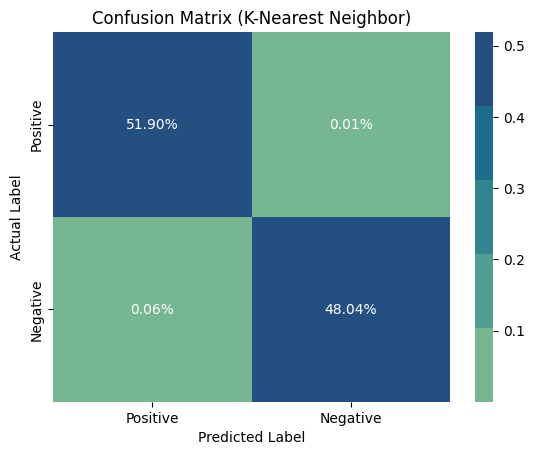

In [ ]:
cm = confusion_matrix(y_tst, y_pred_knn_test)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap=palette, xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (K-Nearest Neighbor)")
plt.show()

### **Logistic Regression**

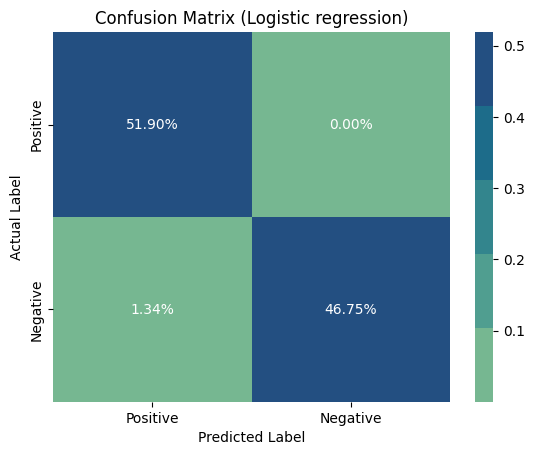

In [ ]:
cm = confusion_matrix(y_tst, y_pred_lr_test)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap=palette, xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (Logistic regression)")
plt.show()

Observation:
- TP for both algorithms is identical (51.90%) and TN for KNN algorithm is slightly better (48.04%) than Logistic Regression (46.75%).
- FP for Logistic Regression algorithm (0.00%) is smaller than KNN (0.001%), but the FN is bigger (1.34% versus 0.06%). It is means that Logistic Regression algorithm tend to misclassified canceled booking as not canceled booking which can be dangerous.

## **Comparison between algorithms**

In [ ]:
diff = pd.DataFrame({'Name': ['K-Nearest Neighbor','Logistic regression'],
                     'accuracy (train)': [acc_knn_train, acc_lr_train],
                     'accuracy (test)': [acc_knn_test, acc_lr_test],
                     'precision (train)': [pre_knn_train, pre_lr_train],
                     'precision (test)': [pre_knn_test, pre_lr_test],
                     'recall (train)': [rec_knn_train, rec_lr_train],
                     'recall (test)': [rec_knn_test, rec_lr_test],
                     'f1 (train)': [f1_knn_train, f1_lr_train],
                     'f1 (test)': [f1_knn_test, f1_lr_test],
                    'time (s)': [knn_execution_time, lr_execution_time]})
diff

,Name,accuracy (train),accuracy (test),precision (train),precision (test),recall (train),recall (test),f1 (train),f1 (test),time (s)
0,K-Nearest Neighbor,0.999400,0.9994,0.999900,0.9999,0.998800,0.9988,0.999300,0.9993,0.048332
1,Logistic regression,0.999373,0.9866,0.999864,0.9999,0.998833,0.9721,0.999348,0.9858,0.688486


Observation:
- KNN has better recall (99.88%) than Logistic Regression (97.19%), meaning it correctly identifies more high-risk cases.
- Logistic Regression has perfect precision (100%), meaning when it predicts high risk, it's always correct, but it misclassifies more actual high-risk cases as low risk.
- F1-score is slightly higher for KNN (99.93%) compared to Logistic Regression (98.57%), indicating a better balance between precision and recall.

# **CONCLUSION**

- The number of cancellations generally follows the pattern of total bookings. Some month has spike cancellation e.g. early 2016, late 2016, and mid 2017.
- The major factor of boking cancelation based on Pearson Correlation is Reservation Status, IsResort, Deposit Type, and Lead Time.
- Based on evaluation, the best model for hotel booking cancellation prediction is KNN which has better performance to prevent misclassified status of booking (canceled or not).